In [1]:
from collections import defaultdict
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pickle
from LUPI_evo import *

In [2]:
#Some code that implements progress bars for long computations
#https://www.mikulskibartosz.name/how-to-display-a-progress-bar-in-jupyter-notebook/
bar_length = 20
def update_progress(progress):
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1

    block = int(round(bar_length * progress))

    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)

In [3]:
#Plotting function to pass to the animation function
# Animates single histogram
def update_hist(frame, data):

    #Extract info from data variable
    bins, counts = data

    #Clear the current plot
    plt.cla()

    #Set the axis ranges
    plt.ylim(0, 1.1)
    plt.gca().set_xticks(bins)

    #Plot the histogram
    plt.bar(bins, counts[frame], width=1) #width is the width of the bars

    #Add titles, labels, etc.
    plt.title("Average Player Strategy")
    plt.xlabel("Rank")
    plt.ylabel("Frequency")
    plt.annotate("n = {}".format(3), xy=(0.8, 0.95), xycoords='axes fraction', fontsize=12)
    plt.annotate("p = {:.2f}".format(frame), xy=(0.8,0.9), xycoords='axes fraction', fontsize=12)


#Plotting function to pass to the animation function
# Plots histogram, mean, and std deviation
def update_hist_mean_std(frame, data):

    #Extract info from data variable
    bins, counts, means, std_devs = data
    
    #List of the bars whose heights should be labeled
    ##Right now just the lowest and highest bars are being labeled
    labels_on = [1, max(bins)]

    #Clear the current plot
    plt.cla()
    plt.clf()

    #Plot the histogram
    plt.subplot(121)
    plt.bar(bins, counts[frame], width=1) #width is the width of the bars
    ax = plt.gca()
    #Label Bars
    for x,h in zip(bins, counts[frame]):
        if x in labels_on:
            #Display labels 
            ax.text(x-0.25, 1.05, "{:.2f}".format(float(h)))
    plt.ylim(0, 1.3)
    ax.set_xticks(bins)
    plt.title("Matroid Rank Distribution")
    plt.xlabel("Rank")
    plt.ylabel("Frequency")
    plt.annotate("n = {}".format(3), xy=(0.77, 0.96), xycoords='axes fraction', fontsize=8)
    plt.annotate("Gen = {}".format(frame), xy=(0.77,0.91), xycoords='axes fraction', fontsize=8)
    
    
    #Plot the graph of averages
    plt.subplot(222)
    plt.xlim((0,1))
    plt.ylim((min(means), max(means)))
    plt.plot(probs[:frame], means[:frame])
    plt.title("Mean/Std_Dev (top/botom)")
    
    #Plot standard deviations
    plt.subplot(224)
    plt.xlim((0,1))
    plt.ylim((floor(min(std_devs)), ceil(max(std_devs))))
    plt.plot(probs[:frame], std_devs[:frame])
    plt.xlabel("p")



In [4]:
#Generate Data
with open("data/sim_test.pk", 'rb') as file:
    data = pickle.load(file)

avg_dists = []
for players in data:
    strats = np.array([np.array(p.strat) for p in players])
    scores = np.array([p.score for p in players])
    avg = np.average(strats, 0, weights=(scores if not np.all(scores == 0) else None))
    avg_dists.append(avg)

In [5]:
#Get ready for Plotting

#Prepare bin labels and counts
bins = list(range(1,4))
counts = avg_dists

#Collect all the info the graphing function needs into one variable
data = (bins, counts)

MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

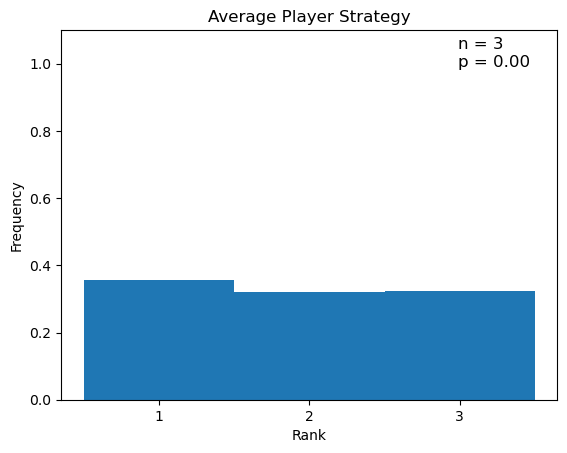

In [6]:
#Animate
fig = plt.figure()
video = animation.FuncAnimation(fig, update_hist, len(avg_dists), fargs=(data,))

#Save the animation
#Careful, running this code twice without changing the filename will overwrite the previous file!
video.save("animation.mp4")